Importing Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [3]:
dataset = pd.read_csv('kerala.csv')
X = dataset.iloc[:,1:14].values
y=dataset.iloc[:,-1].values

Analyse and Visualise the dataset

In [4]:
dataset.isnull().sum() #check if there are any missing values column wise

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [5]:
print(dataset.shape) #print the total number of instances and features

(118, 16)


In [6]:
dataset.describe() #display the dataset

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [10]:
corr_matrix = dataset.corr()
corr_matrix

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


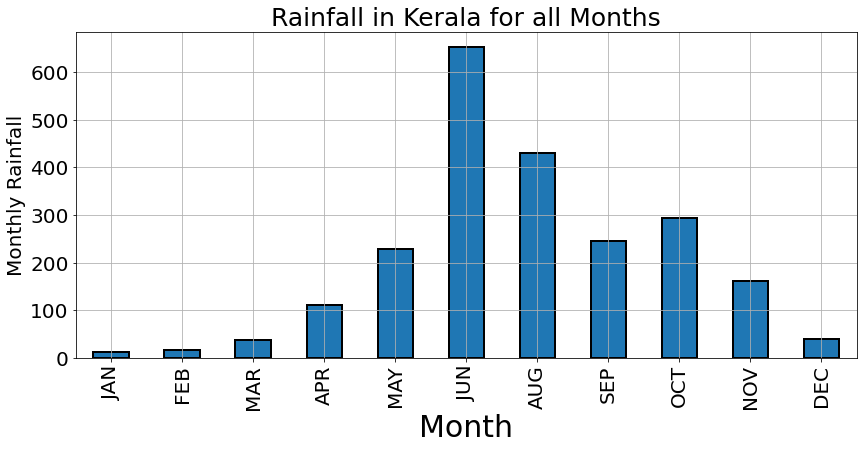

In [13]:
ax = dataset[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerala for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

Label Encoding on independent variable

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

Splitting the dataset into Training and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state=1)

Feature Scaling

In [25]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X_train).transform(X_train)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [27]:
minmax.fit(X_test).transform(X_test)

array([[0.81415929, 0.23831776, 0.12953368, 0.37487127, 0.62945736,
        0.46062603, 0.22061296, 0.46872262, 0.43943606, 0.50115473,
        0.1438499 , 0.46130221, 0.        ],
       [0.46017699, 0.09579439, 0.12435233, 0.28115345, 0.58294574,
        0.77133443, 0.59433596, 0.19738917, 0.        , 0.8339282 ,
        0.56057447, 0.44748157, 0.22310306],
       [0.50442478, 0.21728972, 0.17875648, 0.44799176, 1.        ,
        0.76441516, 0.20367257, 0.51112669, 0.20015886, 0.69263069,
        0.27727589, 1.        , 0.26727067],
       [1.        , 0.05373832, 0.05958549, 0.36045314, 0.67131783,
        0.18187809, 0.25785594, 0.21447345, 0.17772041, 0.27692631,
        0.20778318, 0.28562654, 0.26613817],
       [0.63716814, 0.11915888, 0.51554404, 0.64366632, 0.57209302,
        0.14200988, 0.70037502, 0.31873138, 0.87351072, 0.87423893,
        0.53903174, 0.5279484 , 0.22423556],
       [0.38938053, 0.51635514, 0.66839378, 1.        , 0.66718346,
        0.01598023, 0.30169

In [17]:
dataset.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [19]:
print(y)

[1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 1]


Train Logistic Regression model

In [33]:
x_train_std=minmax.fit_transform(X_train)         # fit the values in between 0 and 1.
y_train_std=minmax.transform(X_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1,max_iter=1000)
lr.fit(X_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

In [34]:
lr_acc #print accuracy

array([0.78125   , 0.80645161, 0.80645161])

In [35]:
lr_proba #print class probability for each training instance

array([[0.64679304, 0.35320696],
       [0.74399794, 0.25600206],
       [0.34069424, 0.65930576],
       [0.66956904, 0.33043096],
       [0.75897195, 0.24102805],
       [0.49898667, 0.50101333],
       [0.53038635, 0.46961365],
       [0.19486814, 0.80513186],
       [0.2709483 , 0.7290517 ],
       [0.65965961, 0.34034039],
       [0.45008012, 0.54991988],
       [0.53042406, 0.46957594],
       [0.1223646 , 0.8776354 ],
       [0.59972912, 0.40027088],
       [0.50676189, 0.49323811],
       [0.28406964, 0.71593036],
       [0.32266926, 0.67733074],
       [0.67450254, 0.32549746],
       [0.64695753, 0.35304247],
       [0.55131497, 0.44868503],
       [0.46865301, 0.53134699],
       [0.53916874, 0.46083126],
       [0.72716779, 0.27283221],
       [0.7923729 , 0.2076271 ],
       [0.31655284, 0.68344716],
       [0.52671904, 0.47328096],
       [0.66643042, 0.33356958],
       [0.43310807, 0.56689193],
       [0.16096575, 0.83903425],
       [0.63683111, 0.36316889],
       [0.

In [36]:
y_pred=lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


Accuracy and Efficiency of model

In [37]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:95.833333
recall score:93.333333
[[ 9  0]
 [ 1 14]]


Train Decision Tree Classification Model

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(X_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,X_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.6875    , 0.58064516, 0.70967742])

In [39]:
y_pred=dtc_clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


Accuracy and Efficiency of model

In [40]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:54.166667
recall score:46.666667
[[6 3]
 [8 7]]


Train Random Forest Classifier model

In [41]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(X_train,y_train)

In [42]:
rmf_clf_acc=cross_val_score(rmf_clf,X_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,X_train,y_train,cv=3,method='predict_proba')

In [43]:
y_pred=rmf_clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


Accuracy and Efficiency of model

In [44]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:83.333333
recall score:73.333333
[[ 9  0]
 [ 4 11]]


Final Accuracy and Comparison of all models

In [46]:

models = []
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

,Name,Score
0,LR,0.958333
1,DT,0.583333
2,RF,0.833333


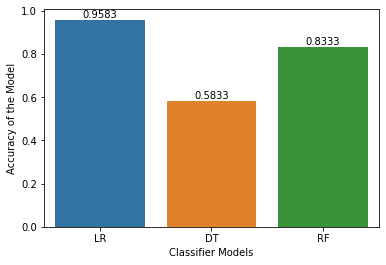

In [47]:

import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [48]:
tr_split['Score'].max()

0.9583333333333334